# Heart disease classification

Problem statment: Heart related illness increases the chances of heart stroke and may take the life of person. Here, the effort is taken to thoroughly analysis hear disease based on how variables how BMI, Age, Race, Mental Health, Smoking etc impacts the heart related problem. This is a fine example of binary classification problem, the model is built to find the label yes or no using machine learning techniques. The number 1 indicates yes for heart disease and 0 no for heart disease

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import chisquare, chi2_contingency

from scipy import stats

from scipy.stats import norm

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
#pip install imbalanced-learn

In [4]:
from imblearn import under_sampling

In [5]:
from imblearn.under_sampling import RandomUnderSampler

In [6]:
RandomUnderSampler()

RandomUnderSampler()

In [7]:
data = pd.read_csv('heart disease.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
data.shape

(319795, 18)

In [10]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
data.describe(include = object)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [12]:
print('categorical variables are ',[col for col in data.select_dtypes(include = object).columns],'\n')
print('numerical variables are ', [col for col in data.select_dtypes(exclude = object).columns] )

categorical variables are  ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'] 

numerical variables are  ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


In [13]:
for col in data.select_dtypes(include = object).columns:
    print(col, data[col].nunique())

HeartDisease 2
Smoking 2
AlcoholDrinking 2
Stroke 2
DiffWalking 2
Sex 2
AgeCategory 13
Race 6
Diabetic 4
PhysicalActivity 2
GenHealth 5
Asthma 2
KidneyDisease 2
SkinCancer 2


from here it is clear that most of the categorical variables are binary type except age category 

In [14]:
data['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

### Checking null values in the data

In [15]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There is no null values in the data

### Checking duplicated values

In [16]:
data.duplicated().sum()

18078

There are duplicated values in the data, these are kept intact as the data does not posses row id to uniquely identiy the data row by row and it is possible to have same sample for data for more rows. 

# Data visualization

In [17]:
percentage = data['HeartDisease'].value_counts()/len(data)*100
print(percentage)

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64


Only 8% for the data is there for label yes rest belongs to class No

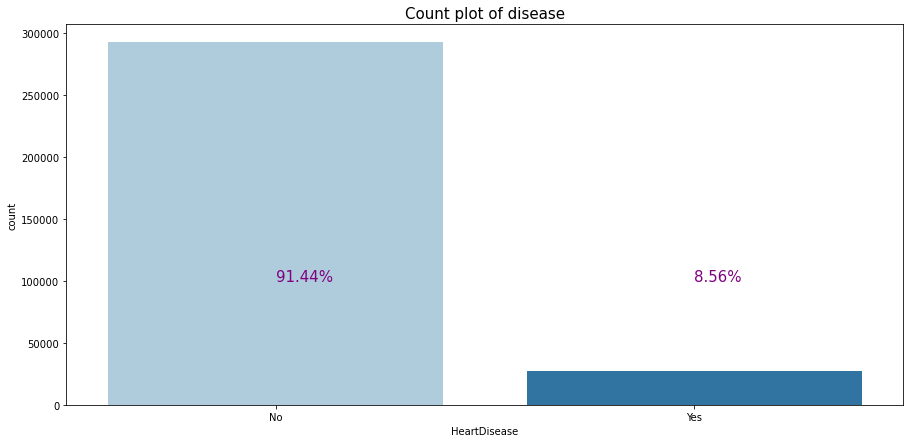

In [18]:
plt.rcParams['figure.figsize'] = 15,7
sns.countplot(x = data['HeartDisease'], palette= 'Paired')
plt.title('Count plot of disease', fontdict= {'size': 15})
plt.text(0,100000,str(round(percentage[0],2))+"%", fontdict={'size':15, 'color':'purple'})
plt.text(1,100000,str(round(percentage[1],2))+"%", fontdict={'size':15, 'color':'purple'})
plt.show()

From the above visualization it is clear that the there is imbalance in the target class for label yes

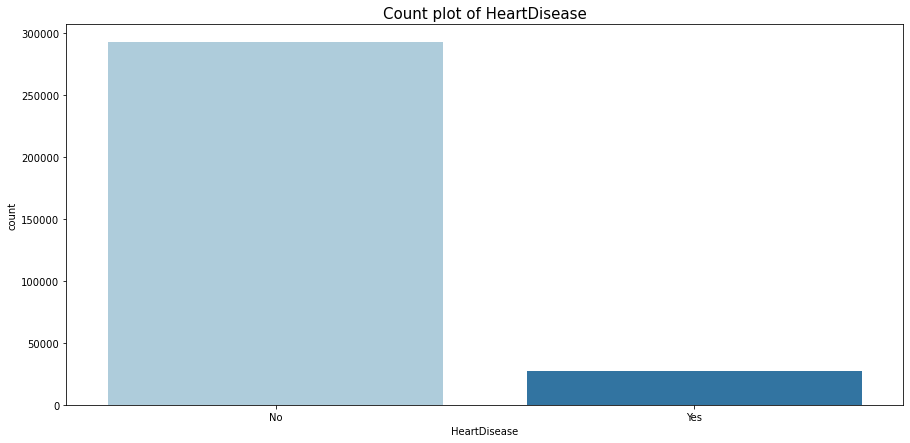

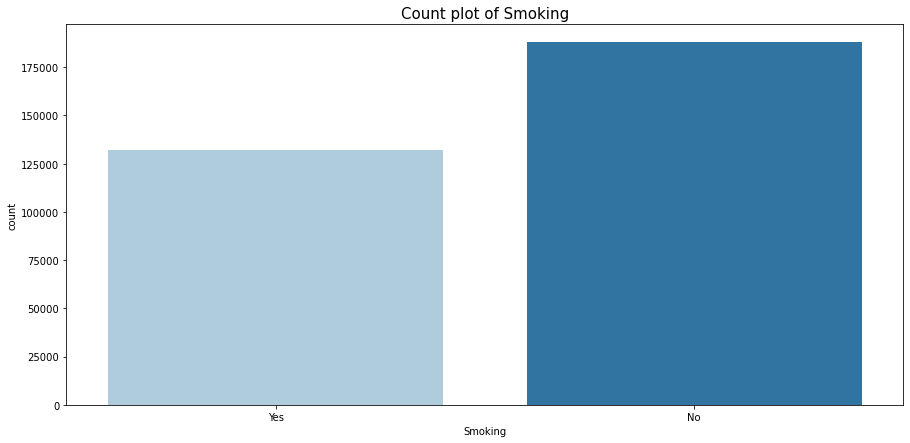

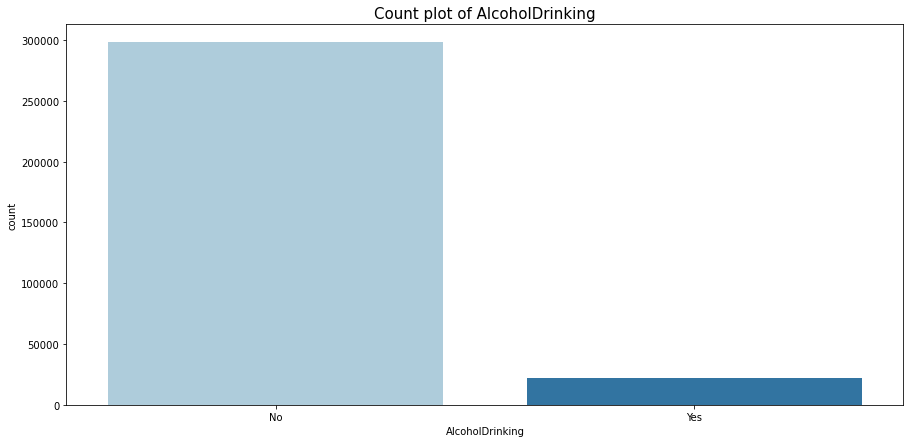

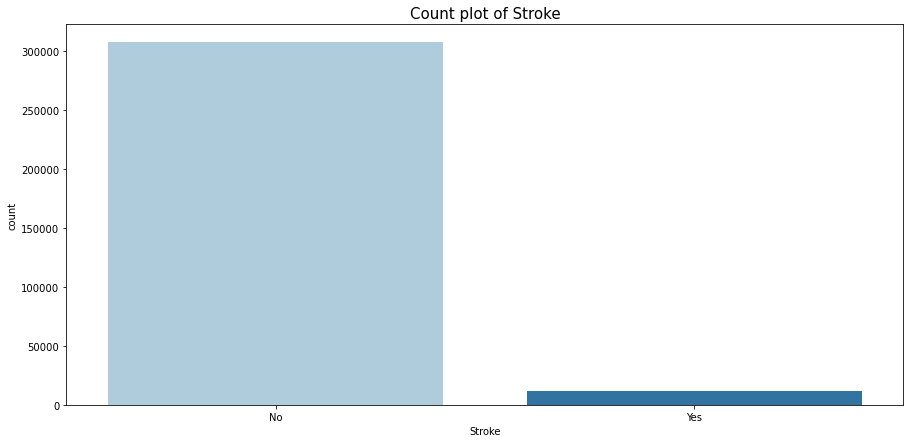

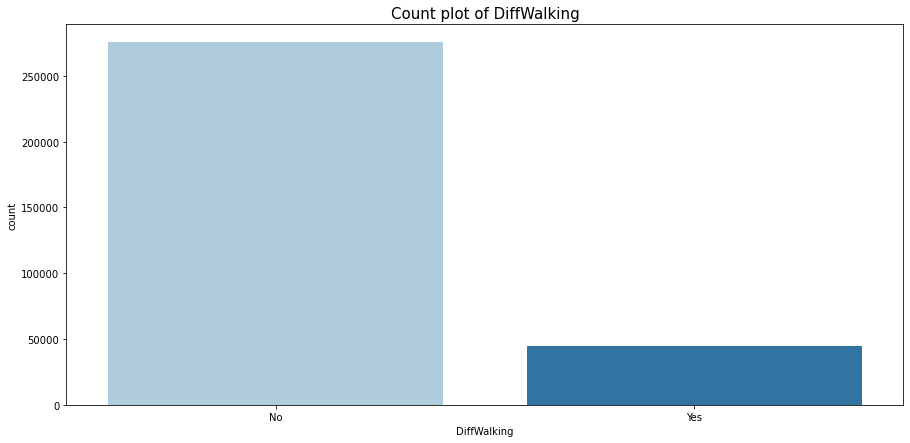

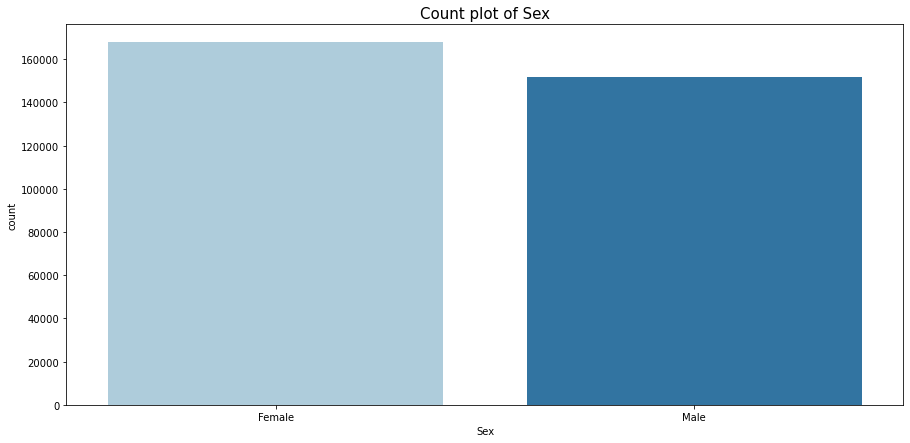

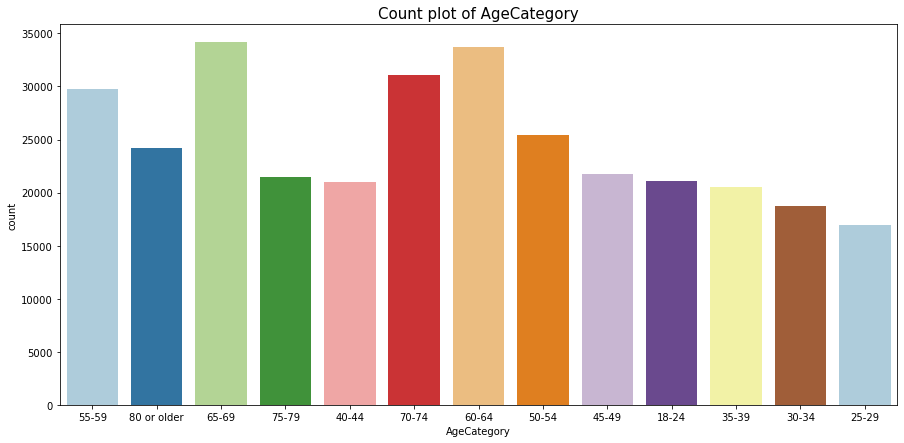

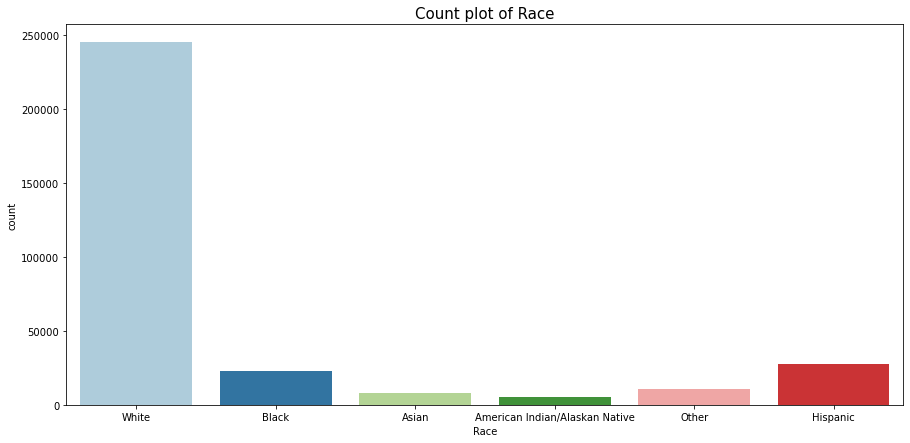

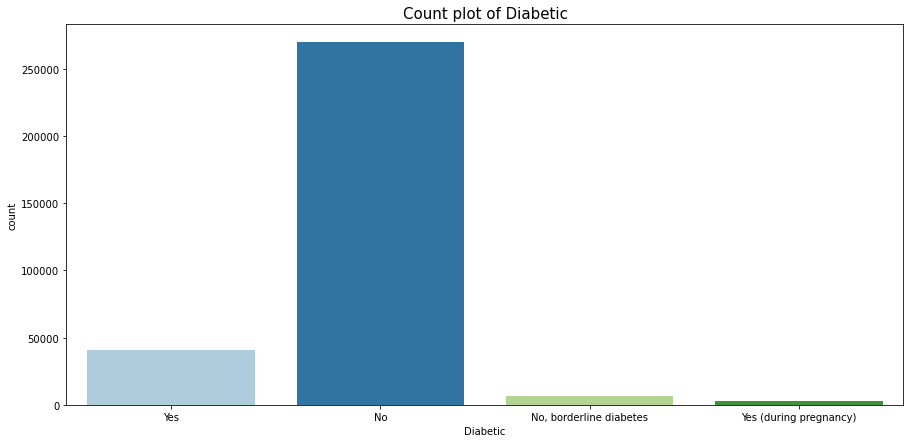

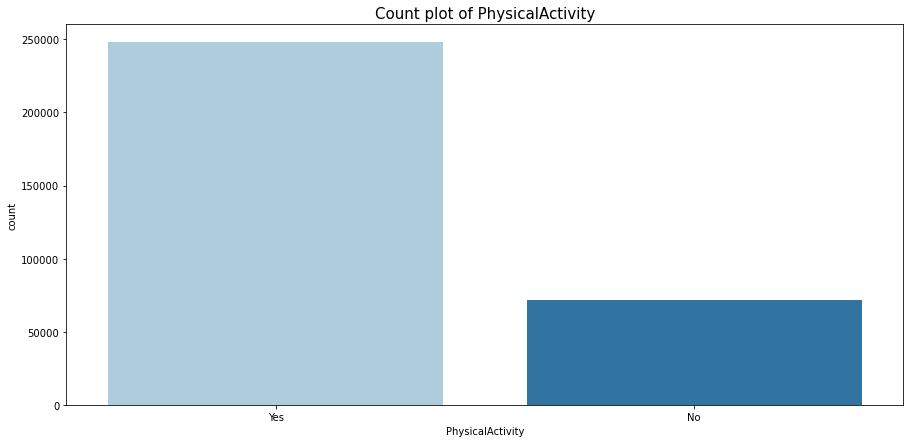

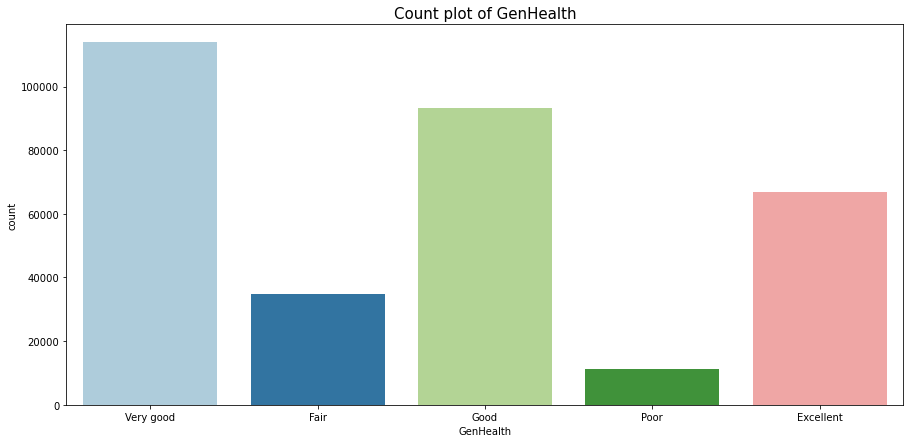

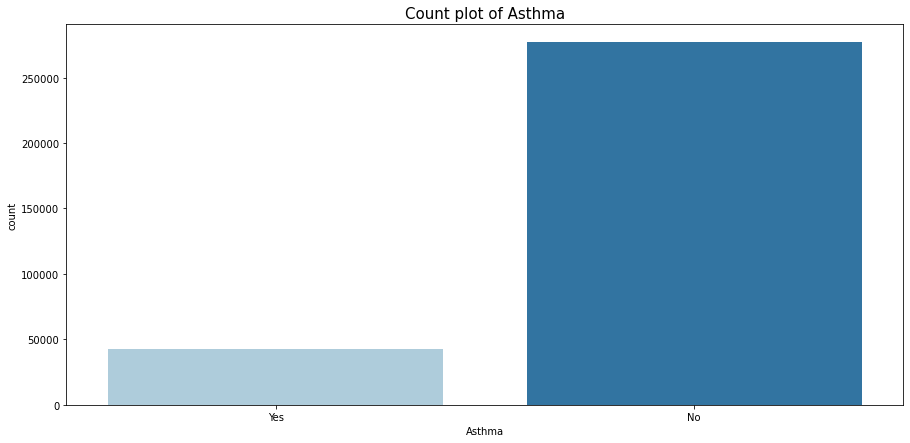

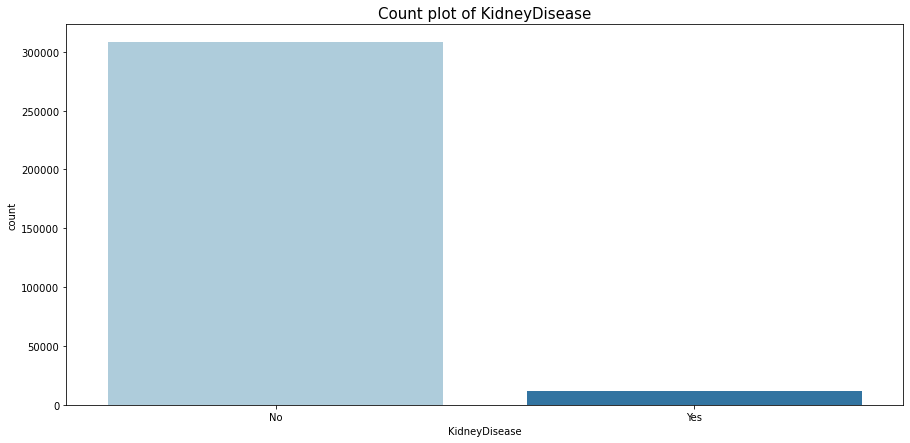

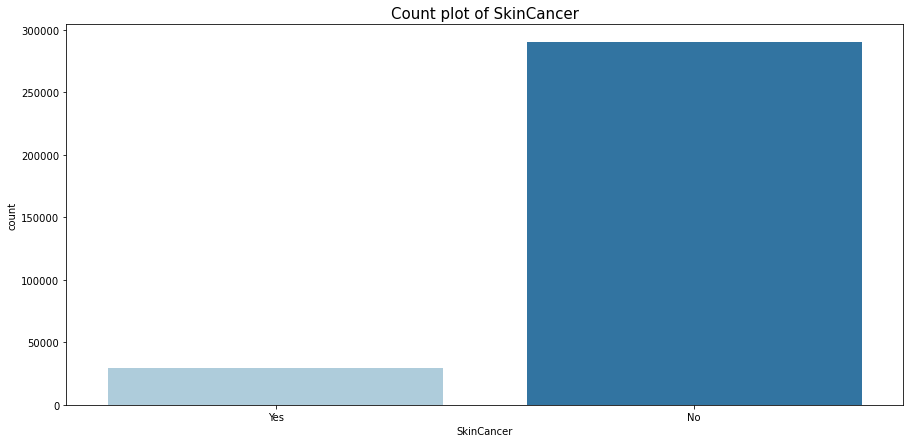

In [19]:
for col in data.select_dtypes(include = object).columns:
    sns.countplot(x = data[col], palette= 'Paired')
    plt.title('Count plot of {}'.format(col), fontdict= {'size': 15})
    plt.show()

From above visualization of the countplot of categorical variables it is clear that there are one class is abundant and other is scarce. For example skin cancer's yes label hardly occupies 10% of the data while rest is to label No. Age  is the categories that cover approximately same counts for each categories

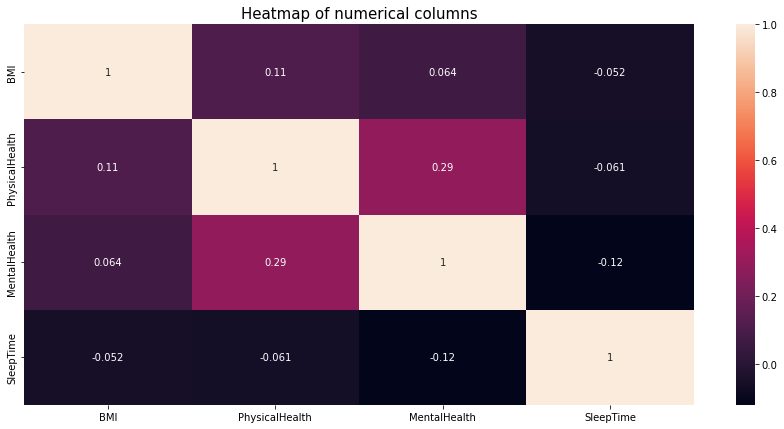

In [20]:
sns.heatmap(data[list(data.select_dtypes(exclude = object).columns)].corr(), annot= True)
plt.title("Heatmap of numerical columns", fontdict= {'size': 15})
plt.show()

Multiccollinearity in numerical columns are very feeble that is good for the data set

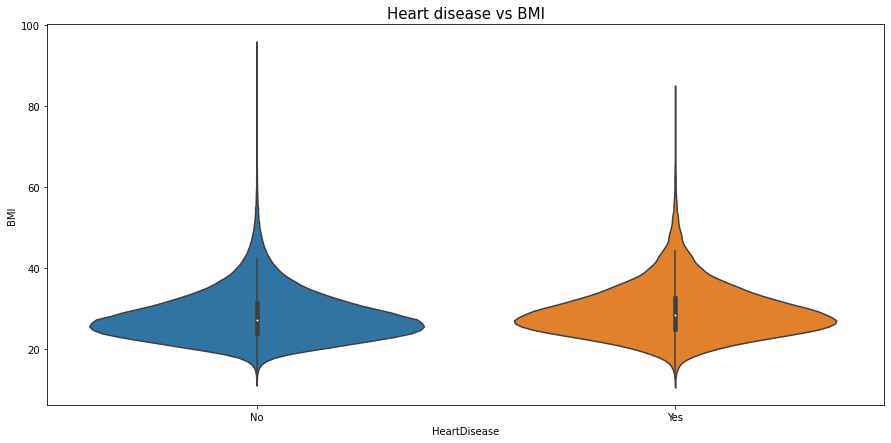

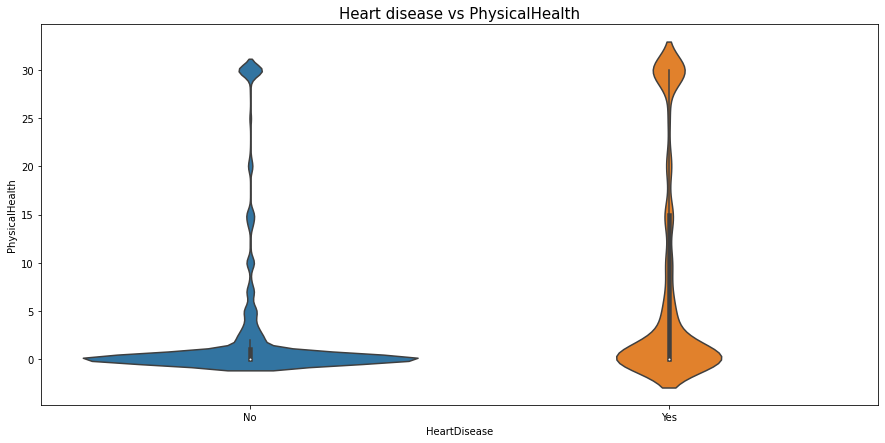

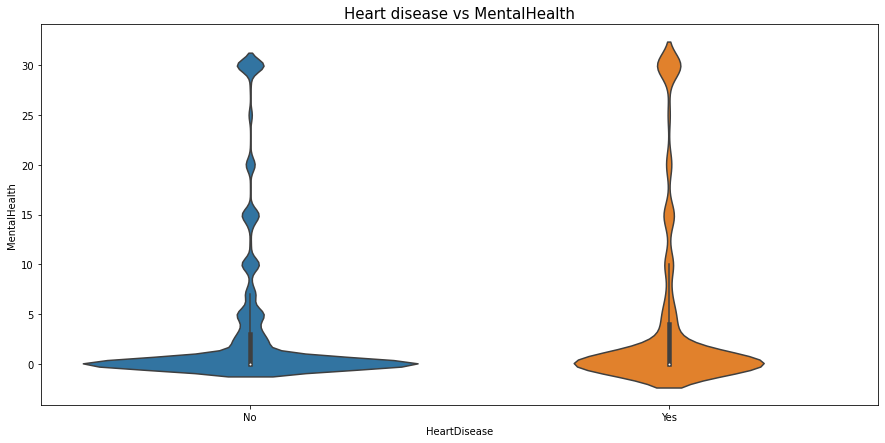

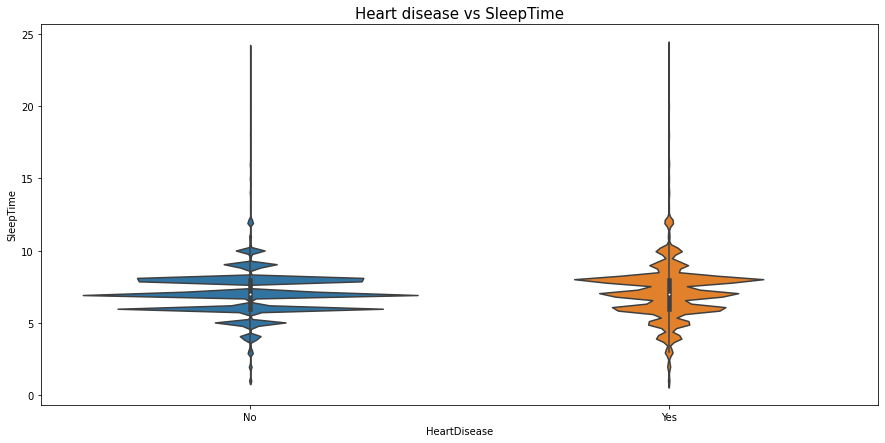

In [21]:
for col in data.select_dtypes(exclude = object).columns:
    sns.violinplot(x = data.HeartDisease, y = data[col])
    plt.title('Heart disease vs {}'.format(col), fontdict= {'size': 15})
    plt.show()

From above there does not seem any relation of heart disease with BMI, however the distribution for sleep time, mental health and physical health with heart disease varies. It conveys sleep time, mental and physical healh effects heart diseases

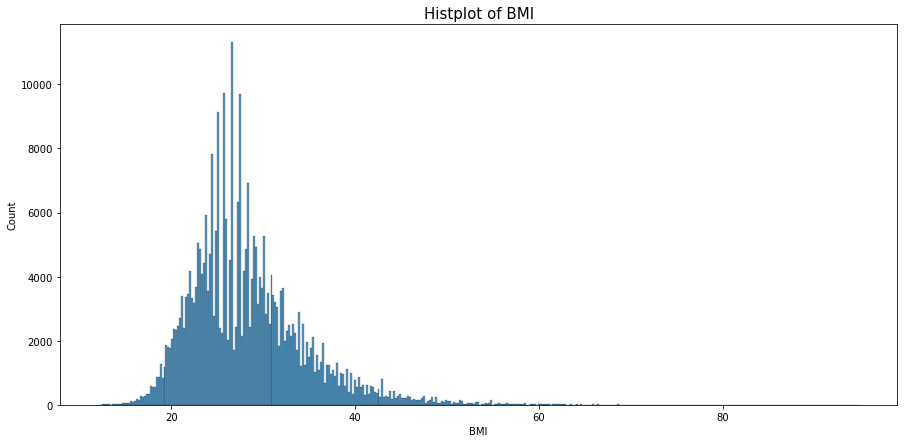

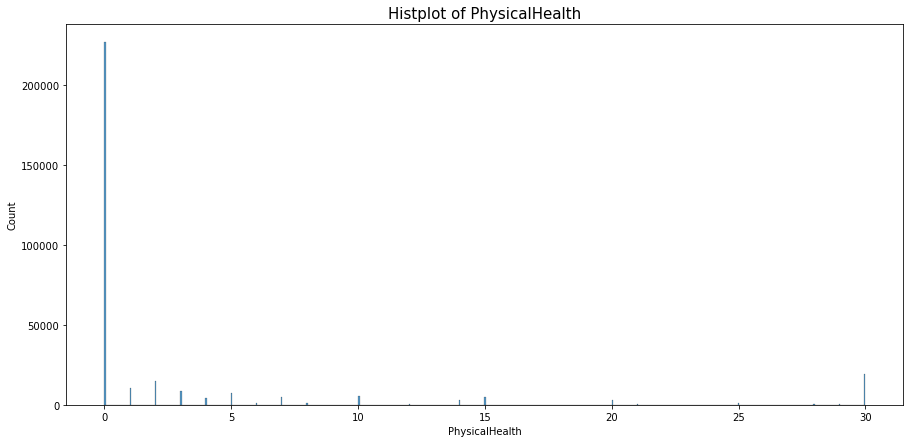

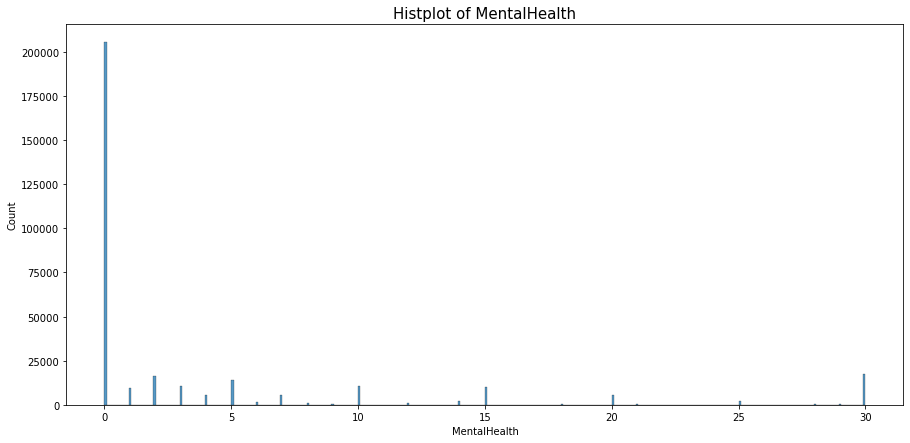

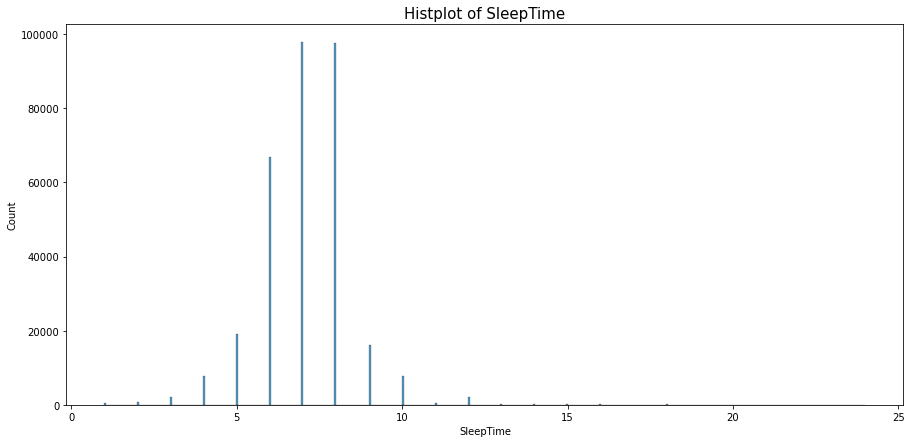

In [22]:
for col in data.select_dtypes(exclude = object).columns:
    sns.histplot(x = data[col])
    plt.title('Histplot of {}'.format(col), fontdict= {'size': 15})
    plt.show()

From above histplot of BMI and sleep time appear to follow normal distribution but otheres are not following

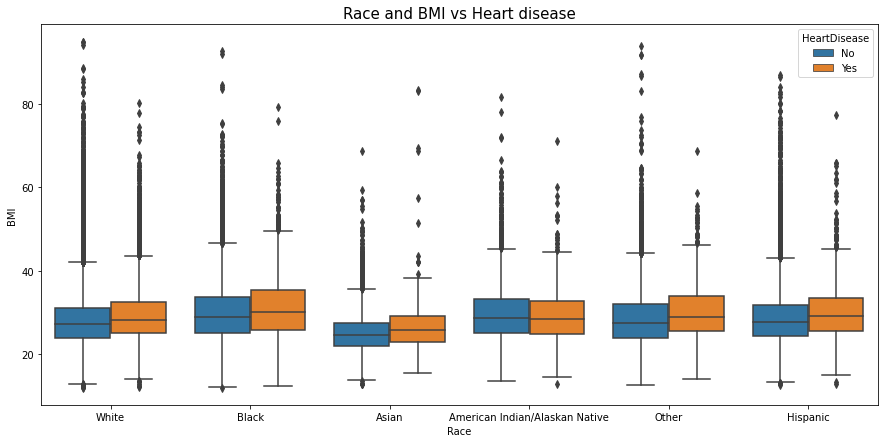

In [23]:
sns.boxplot(x = data['Race'], y = data['BMI'], hue= data['HeartDisease'])
plt.title('Race and BMI vs Heart disease', fontdict={'size': 15})
plt.show()

From above it is clear that heart disease's BMI mean is different for different categories of races, hence races and BMI together impacts the heart disease

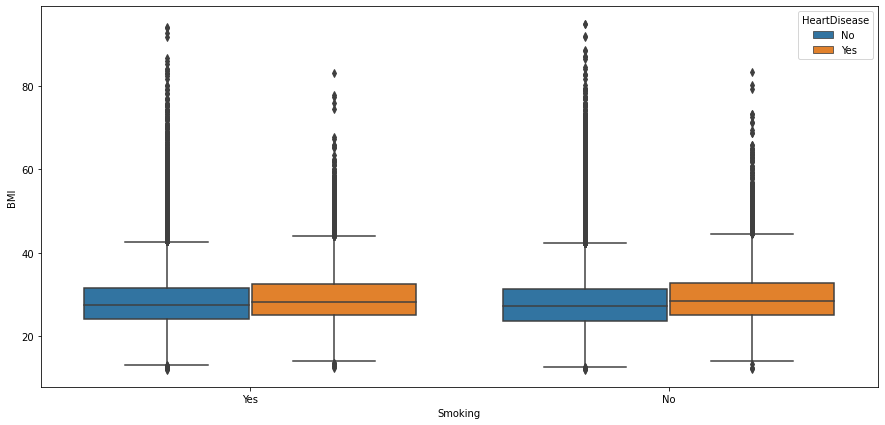

In [24]:
sns.boxplot(x = data['Smoking'], y = data['BMI'], hue= data['HeartDisease'])
plt.show()

The mean of BMI for heart diseases slightly varies for smoker and non smoker, it conveys that BMI and smoking together impacts heart disease

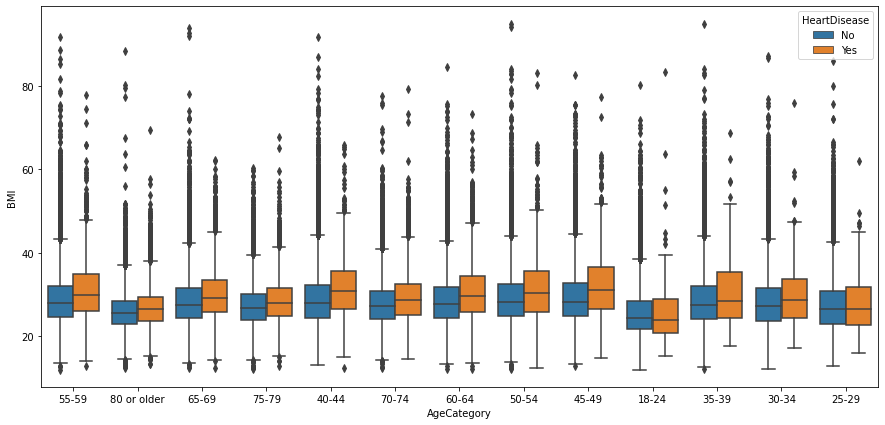

In [25]:
sns.boxplot(x = data['AgeCategory'], y = data['BMI'], hue= data['HeartDisease'])
plt.show()

The BMI mean varies a loth for different age categories, it effectively shows that the impacts of age and BMI is very much on 
the heart disease

# Statistical analysis

In [26]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [27]:
print('skewness for the BMI',data['BMI'].skew())
print('skewness for the Sleep Time', data['SleepTime'].skew())

skewness for the BMI 1.3324306428979513
skewness for the Sleep Time 0.6790346208011537


In [28]:
for col in data.select_dtypes(exclude = object).columns:
    print('skewness for {} '.format(col), data[col].skew())

skewness for BMI  1.3324306428979513
skewness for PhysicalHealth  2.6039732622480822
skewness for MentalHealth  2.331111549136165
skewness for SleepTime  0.6790346208011537


## Checking dependency test of heart diseases with categorical columns (Chi square)

Framing hypothesis

Ho: heart disease and smoking are independent

H1: hear disease and smoking are dependent

In [29]:
consistency_table = pd.crosstab(data['HeartDisease'], data['Smoking'])
consistency_table

Smoking,No,Yes
HeartDisease,,
No,176551,115871
Yes,11336,16037


In [30]:
p_val = chi2_contingency(consistency_table)[1]
print('p value of the test ',p_val)

p value of the test  0.0


From above it is clear that the p value is less than 0.05 (considering standard level of significance)

it means we rejects null hypothesis, it conveys that the heart disease and smoking are dependent

similary checking for all categorical variables

In [31]:
def test_of_independence_categorical(x, y): # function will return p value of chi squqre independence test
    consistency_table = pd.crosstab(x,y)
    p_val = chi2_contingency(consistency_table)[1]
    return p_val

In [32]:
list_col  = ['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',]

In [33]:
for col in list_col:
    print(col, test_of_independence_categorical( data['HeartDisease'], data[col]))

Smoking 0.0
AlcoholDrinking 1.892352227090306e-73
Stroke 0.0
DiffWalking 0.0
Sex 0.0
AgeCategory 0.0
Race 2.9886131565632597e-180
Diabetic 0.0
PhysicalActivity 0.0
GenHealth 0.0
Asthma 2.2386144306283177e-121
KidneyDisease 0.0


from above it is clear that p values of call categorical values are less than level of significance, it conveys all categorical variables are dependent on target varialbes. In other words are variabes are signficant for the model to build.

### Checking dependency heart disease with BMI (ANNOVA)

First we need to check the normality of variables to satisfy assumption of the BMI, in order to check normaily shapiro wilk test or jarque bera test will be applied

Hypothesis for normal test

H0 (Null hypothesis): BMI is normally distributed

H1 (Alternative hypothesis): BMI is not normally distributed

In [34]:
testing_sample = data['BMI'].sample(frac=0.01, random_state = 41)
stats.shapiro(testing_sample)

ShapiroResult(statistic=0.9320013523101807, pvalue=6.697033245769763e-36)

From above it is clear that p value is less than 0.05 , reject null hypothesis, meaning data is not normal.

Since BMI does not follow normal distribution , need to go ahead with non parametric test for evaluation which is Kruskal walli test

Hypothesis for kruskal walli test

H0:  bmi for yes or no mean are same

H1: bmi for yes or no contain atleast one pair where means are not same

In [35]:
no = data['BMI'][data.HeartDisease =='No']
yes = data['BMI'][data.HeartDisease =='Yes']


In [36]:
stats.kruskal(no, yes)

KruskalResult(statistic=1051.9859563380667, pvalue=9.008973206220579e-231)

from kruskalw wali test it is clear that p is almost 0 which is very less, it supports the argument that null hypothesis is rejected, it conveys bmi impacts heart disease

# Pre-processing

In [37]:
data['HeartDisease'].value_counts()/len(data)*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

In [38]:
data.shape[0]*0.08

25583.600000000002

In [39]:
Y = data['HeartDisease'].replace({'Yes':1, 'No':0}) # target columns
Y.unique()

array([0, 1], dtype=int64)

In [40]:
data_stats = pd.get_dummies(data , columns= data.select_dtypes(include = object).columns , drop_first= False)
data = pd.get_dummies(data , columns= data.select_dtypes(include = object).columns , drop_first= True)

In [41]:
X_num = data[list(data.select_dtypes(exclude = object).columns)]

scaler = StandardScaler()   # appling standard transformation on numerical columns
X_num_scaled = scaler.fit_transform(X_num)

In [42]:
df_X_num = pd.DataFrame(X_num_scaled, columns= X_num.columns)
df_X_num.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,-1.460354,-0.305954,1.193474,-0.27032,-0.198040,-0.401578,-0.951711,...,2.614905,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,2.541515,-0.195554,3.118419
1,-1.256338,-0.424070,-0.490039,-0.067601,-0.305954,-0.837890,-0.27032,5.049478,-0.401578,-0.951711,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675
2,-0.274603,2.091388,3.281069,0.628776,-0.305954,1.193474,-0.27032,-0.198040,-0.401578,1.050739,...,2.614905,-0.089814,0.538256,2.867422,-0.640987,-0.191292,-0.743558,2.541515,-0.195554,-0.320675
3,-0.647473,-0.424070,-0.490039,-0.763977,-0.305954,-0.837890,-0.27032,-0.198040,-0.401578,-0.951711,...,-0.382423,-0.089814,-1.857852,-0.348745,1.560094,-0.191292,-0.743558,-0.393466,-0.195554,3.118419
4,-0.726138,3.097572,-0.490039,0.628776,-0.305954,-0.837890,-0.27032,-0.198040,2.490174,-0.951711,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675


In [43]:
# updating numerical columns in the data and data-stats

for col in df_X_num.columns:  # updating scaled values of numerical columns
    data[col] = df_X_num[col]
    data_stats[col] = df_X_num[col]

In [44]:
data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,-1.460354,-0.305954,1.193474,-0.27032,-0.198040,-0.401578,-0.951711,...,2.614905,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,2.541515,-0.195554,3.118419
1,-1.256338,-0.424070,-0.490039,-0.067601,-0.305954,-0.837890,-0.27032,5.049478,-0.401578,-0.951711,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675
2,-0.274603,2.091388,3.281069,0.628776,-0.305954,1.193474,-0.27032,-0.198040,-0.401578,1.050739,...,2.614905,-0.089814,0.538256,2.867422,-0.640987,-0.191292,-0.743558,2.541515,-0.195554,-0.320675
3,-0.647473,-0.424070,-0.490039,-0.763977,-0.305954,-0.837890,-0.27032,-0.198040,-0.401578,-0.951711,...,-0.382423,-0.089814,-1.857852,-0.348745,1.560094,-0.191292,-0.743558,-0.393466,-0.195554,3.118419
4,-0.726138,3.097572,-0.490039,0.628776,-0.305954,-0.837890,-0.27032,-0.198040,2.490174,-0.951711,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675


In [ ]:
# deleting the target columns from the data and data_stats
data.drop(columns='HeartDisease_Yes', axis =1, inplace= True)
data_stats.drop(columns='HeartDisease_Yes', axis =1, inplace= True)

### Dealing imbalancing of data

In [45]:
print(data.shape)

(319795, 38)


In [46]:
under_sample = RandomUnderSampler(replacement= False)
data_under , Y_under= under_sample.fit_resample(data, Y)

In [47]:
data_under.shape

(54746, 38)

In [50]:
Y_under.value_counts()/len(Y_under)*100 # now data is balanced

0    50.0
1    50.0
Name: HeartDisease, dtype: float64

### Splitting of the data into train and test in ratio 80/20

In [52]:
X_train, X_test, y_train, y_test= train_test_split(data, Y, train_size= 0.2, random_state= 10)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(63959, 38)
(255836, 38)
(255836,)
(63959,)


# Applying Logisitic regresion

In [53]:
log = LogisticRegression()
log_model = log.fit(X_train, y_train)
train_prediction = log_model.predict(X_train)
test_prediction = log_model.predict(X_test)
print('train ',metrics.classification_report(y_train, train_prediction, digits= 5))
print('test ',metrics.classification_report(y_test, test_prediction, digits= 5))

train                precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     58482
           1    1.00000   1.00000   1.00000      5477

    accuracy                        1.00000     63959
   macro avg    1.00000   1.00000   1.00000     63959
weighted avg    1.00000   1.00000   1.00000     63959

test                precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    233940
           1    1.00000   1.00000   1.00000     21896

    accuracy                        1.00000    255836
   macro avg    1.00000   1.00000   1.00000    255836
weighted avg    1.00000   1.00000   1.00000    255836



Train acccuracy is 100% and f1 score is also 100%

Test accuracy is 100% and f1 score is aslo 100%

The model is perfect it is doing excellent on both train and test there is no under fitting and overfitting either

In [58]:
print('Confustion Matrix')
print(metrics.confusion_matrix( y_test, test_prediction))

Confustion Matrix
[[233940      0]
 [     0  21896]]


There is not wrong prediction, out model is doing excellent

### Applying Gaussian naive bayes

In [57]:
model_fit = GaussianNB()
model = model_fit.fit(X_train, y_train)
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)
print('train ',metrics.classification_report(y_train, train_prediction, digits= 5))
print('test ',metrics.classification_report(y_test, test_prediction, digits= 5))

train                precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     58482
           1    1.00000   1.00000   1.00000      5477

    accuracy                        1.00000     63959
   macro avg    1.00000   1.00000   1.00000     63959
weighted avg    1.00000   1.00000   1.00000     63959

test                precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    233940
           1    1.00000   1.00000   1.00000     21896

    accuracy                        1.00000    255836
   macro avg    1.00000   1.00000   1.00000    255836
weighted avg    1.00000   1.00000   1.00000    255836




Train acccuracy is 100% and f1 score is also 100%

Test accuracy is 100% and f1 score is aslo 100%

The model is perfect it is doing excellent on both train and test there is no under fitting and overfitting either

Both gaussian naive bayes and logistic regression are doing well, there is no scope for further improvement so other model is not needed to check out


The key to succes here is balancing the data with under sampling technique, under sampling techinque is preferred as the data size was huge in the project presented.